## Import essential libaries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Read data 

In [2]:
data_port = pd.read_csv("portfolio.csv")
data_port.head() 

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [3]:
data_customer = pd.read_csv("profile.csv")
data_customer.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
data_transcript = pd.read_csv("transcript.csv")
data_transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


## Data pre-processing

### Drop unnecessary data 

In [5]:
data_port = data_port.drop('Unnamed: 0', axis = 1)
data_customer = data_customer.drop('Unnamed: 0', axis = 1)
data_transcript = data_transcript.drop('Unnamed: 0', axis = 1)

### Checking null values 

In [6]:
data_port.isna(). sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [7]:
data_customer.isna(). sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [8]:
data_transcript.isna(). sum()

person    0
event     0
value     0
time      0
dtype: int64

## Droping null values of customer data  

In [9]:
missing_gender = data_customer[data_customer['gender'].isna()]
missing_income = data_customer[data_customer['income'].isna()]
np.sum(missing_gender['id'] == missing_income['id'])

2175

In [10]:
id_to_remove = missing_income['id']
data_customer_no_na = data_customer[~data_customer['id'].isin(id_to_remove)]
data_customer_no_na = data_customer_no_na.reset_index(drop = True)
data_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


## Data types analsysis

In [11]:
data_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [12]:
channels_0 = data_port['channels'][0]
offer_type_0 = data_port['offer_type'][0]
id_0 = data_port['id'][0]
print('First value in column channels:', channels_0, '  --   Data type:', type(channels_0))
print('First value in column offer_type:', offer_type_0, '  --   Data type:', type(offer_type_0))
print('First value in column id:', id_0, '  --   Data type:', type(id_0))

First value in column channels: ['email', 'mobile', 'social']   --   Data type: <class 'str'>
First value in column offer_type: bogo   --   Data type: <class 'str'>
First value in column id: ae264e3637204a6fb9bb56bc8210ddfd   --   Data type: <class 'str'>


In [13]:
data_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


In [14]:
data_customer_no_na['became_member_on'] = pd.to_datetime(data_customer_no_na['became_member_on'], format = '%Y%m%d')

## Data types of transcript 

In [15]:
data_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [16]:
data_transcript.rename(columns = {'time' : 'hours_since_start'}, inplace = True)
data_transcript.head(1)

,person,event,value,hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0


In [17]:
# Check data type of column `value`
type(data_transcript['value'][0])

str

## Data Transformation

### Transform df_port

In [18]:
data_port = data_port.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)
from string import ascii_uppercase
data_port['offer_alias'] = [ascii_uppercase[i] for i in range(data_port.shape[0])]
data_port

,reward,channels,difficulty,duration,offer_type,id,offer_alias
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J


### Transform data_transcript

In [19]:
value_column = data_transcript['value']
value_column = value_column.apply(eval)
value_column[:3]

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
Name: value, dtype: object

In [20]:
dictionary_key_column = [list(d.keys())[0] for d in value_column]
dictionary_value_column = [list(d.values())[0] for d in value_column]
# Create a df containing the keys and values of the dictionary elements of `value_column`
value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column
value_column_split.head(3)

,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5


In [21]:
# Replace `value` column with df `value_column_split`
data_transcript_value_mod = data_transcript.drop('value', axis = 1)
data_transcript_value_mod = pd.concat([data_transcript_value_mod, value_column_split], axis = 1)

In [22]:
data_transcript_value_mod.columns.values

array(['person', 'event', 'hours_since_start', 'dict_key', 'dict_value'],
      dtype=object)

In [23]:
col_names = ['person', 'event', 'dict_key', 'dict_value', 'hours_since_start']
data_transcript_value_mod = data_transcript_value_mod[col_names]
data_transcript_value_mod.sample(3)

,person,event,dict_key,dict_value,hours_since_start
40915,e08f5946ac204395ba4b6168505eccbc,transaction,amount,3.25,96
304690,96bce0abe1e04098b7ead648cc957c0d,transaction,amount,22.92,708
228716,0a08679f042649e6b771d3fd7f6d69e7,transaction,amount,16.99,528


### Checkpoints after data cleaning

In [24]:
offers = data_port.copy()
customers = data_customer_no_na.copy()
transcripts = data_transcript_value_mod.copy()

## Exploratory Data Analysis (EDA)

### EDA on customer profile data

### Univariate Analysis based on gender

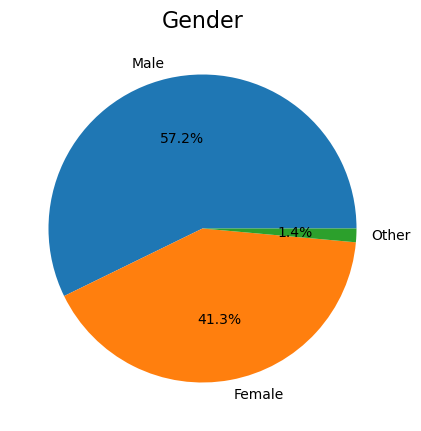

In [25]:
wedge_size =  data_customer_no_na['gender'].value_counts()
wedge_label = ['Male', 'Female', 'Other']
plt.figure(figsize = (5,5))
plt.pie(x = wedge_size, labels = wedge_label, autopct = '%1.1f%%')
plt.title('Gender', fontsize = 16)
plt.show()

### Univariate Analysis of age

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


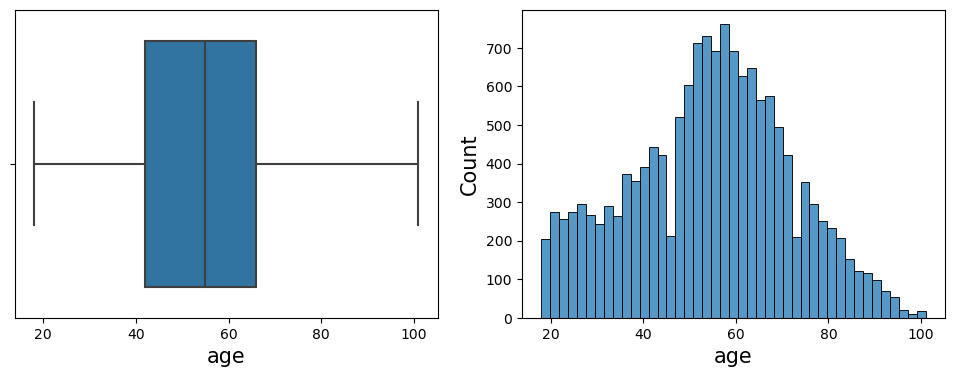

In [26]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'age', ax = axs[0])
sns.histplot(data = customers, x = 'age', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)
print(customers['age'].describe())

### Divide customers into different age groups

In [27]:
# Create a new column `age_group`
age_group = pd.cut(customers['age'],
      bins = [customers['age'].min(), 26, 36, 46, 56, 66, 76, 86, customers['age'].max()],
      labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys'])
customers['age_group'] = age_group

### Visualize customers by age groups

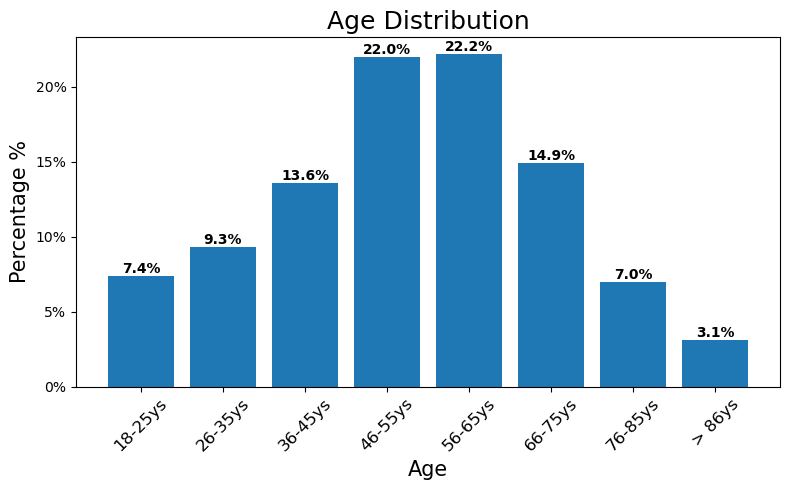

In [28]:
age_group_percentage = (customers.value_counts('age_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,25,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Age Distribution', fontsize = 18)
bar_plot = plt.bar(x = age_group_percentage.index.values, height = age_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(age_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold')
plt.tight_layout()
plt.show()

### Univariate Analysis of income

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


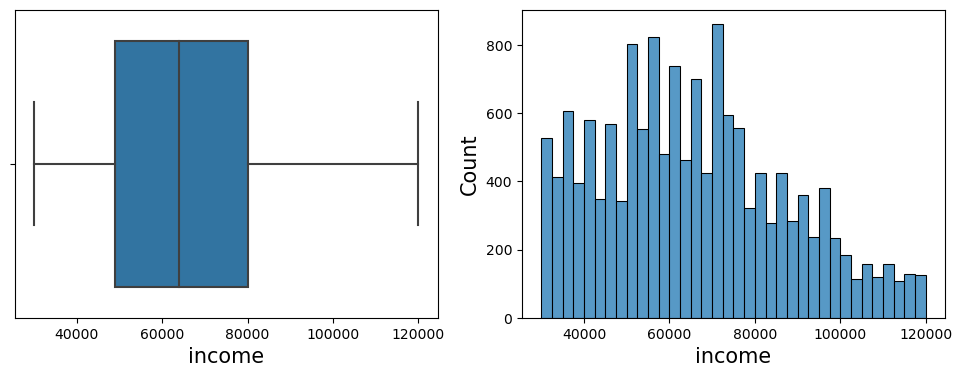

In [29]:
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'income', ax = axs[0])
sns.histplot(data = customers, x = 'income', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)
print(customers['income'].describe())

### Divide customers into income groups

In [30]:
income_group = pd.cut(customers['income'],
      bins = [customers['income'].min(), 45000, 60000, 75000, 90000, 105000, customers['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
customers['income_group'] = income_group

### Visualize customers by income groups

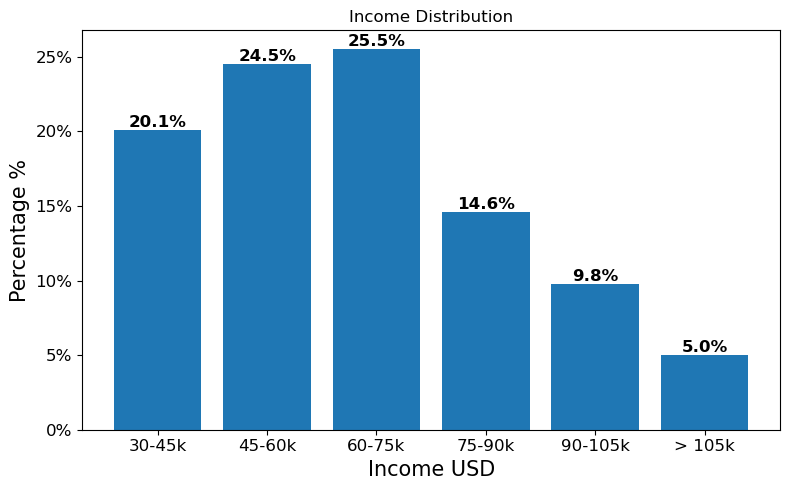

In [31]:
income_group_percentage = (customers.value_counts('income_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,30,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('Income USD', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Income Distribution')

bar_plot = plt.bar(x = income_group_percentage.index.values, height = income_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(income_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold', fontsize = 12)

plt.tight_layout()
plt.show()

In [32]:
# Create a new df focusing on the time customers became members
df_member = customers[['id', 'became_member_on']]
# Add columns `year`, `month`, `day_of_week`
df_member = df_member.assign(year = df_member.became_member_on.dt.year,
                             month = df_member.became_member_on.dt.month,
                             day = df_member.became_member_on.dt.day,
                             month_name = df_member.became_member_on.dt.month_name(),
                             day_of_week = df_member.became_member_on.dt.weekday,
                             day_name = df_member.became_member_on.dt.day_name())
df_member.head(3)

,id,became_member_on,year,month,day,month_name,day_of_week,day_name
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,2017,7,15,July,5,Saturday
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,2017,5,9,May,1,Tuesday
2,e2127556f4f64592b11af22de27a7932,2018-04-26,2018,4,26,April,3,Thursday


### Visualisation of Member growth by year

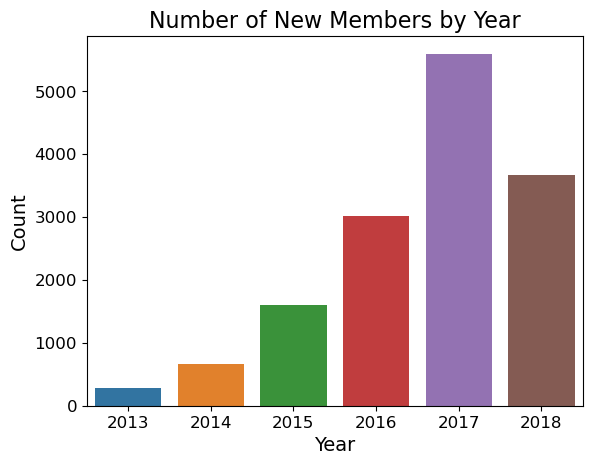

In [33]:
sns.countplot(data = df_member, x = 'year')
plt.title('Number of New Members by Year', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Year', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

### Daily member growth

In [34]:
# Time series with the number of new member on each day
p = df_member.value_counts('became_member_on').sort_index()
df_member_growth = pd.DataFrame(index = p.index.values, data = p.values, columns = ['Number of New Members'])

In [35]:
#Four phases with clearly different daily growth
phase_1 = df_member_growth.loc['2013-july': '2015-july']
len_phase_1 = phase_1.shape[0]
mean_phase_1 = phase_1.mean().values

phase_2 = df_member_growth.loc['2015-august': '2017-july']
len_phase_2 = phase_2.shape[0]
mean_phase_2 = phase_2.mean().values

phase_3 = df_member_growth.loc['2017-august': '2018-jan']
len_phase_3 = phase_3.shape[0]
mean_phase_3 = phase_3.mean().values

phase_4 = df_member_growth.loc['2018-feb': '2018-july']
len_phase_4 = phase_4.shape[0]
mean_phase_4 = phase_4.mean().values

### Visualization of member growth

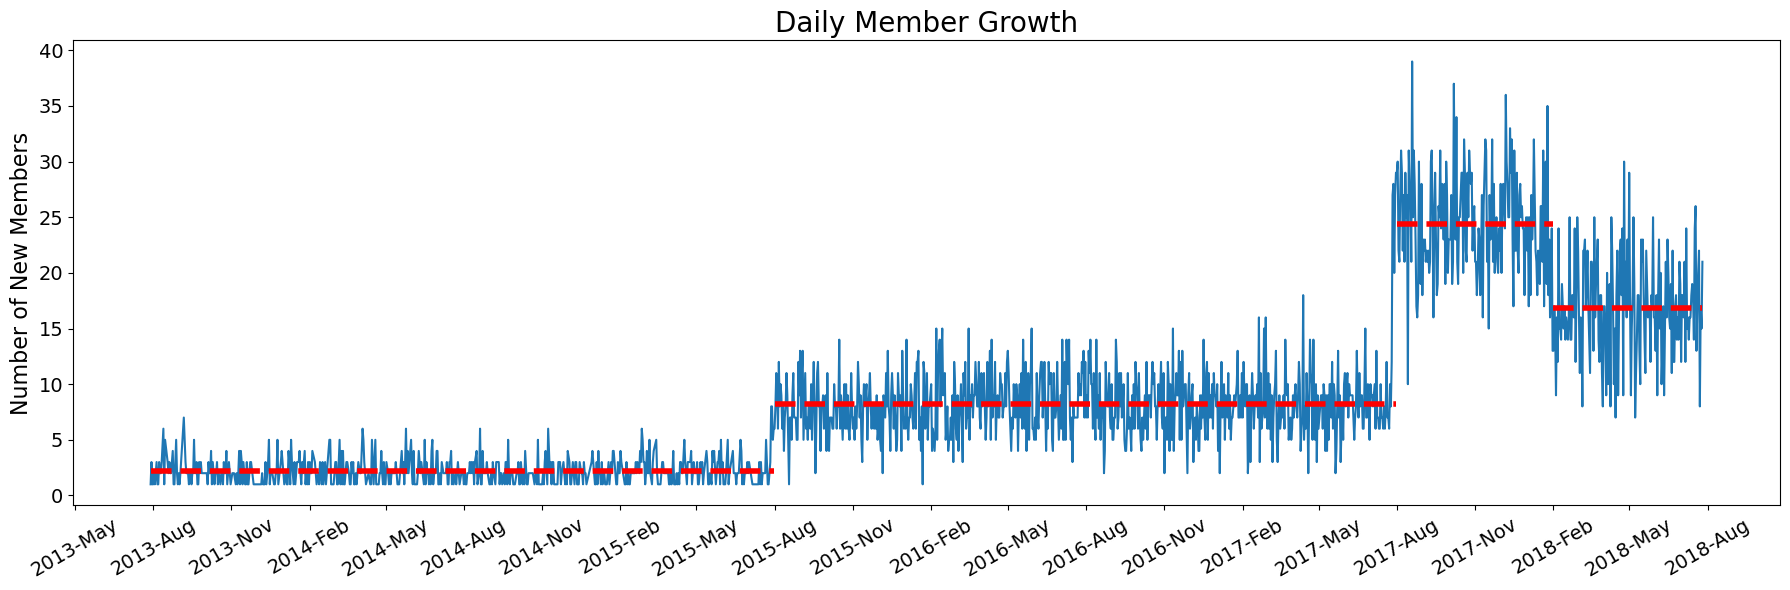

In [36]:
plt.figure(figsize = (18,6))
ax = sns.lineplot(x = df_member_growth.index.values, y = df_member_growth['Number of New Members'])
date_format = mdates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))

plt.plot(phase_1.index.values, np.ones(len_phase_1)*mean_phase_1, '--r', lw = 4)
plt.plot(phase_2.index.values, np.ones(len_phase_2)*mean_phase_2, '--r', lw = 4)
plt.plot(phase_3.index.values, np.ones(len_phase_3)*mean_phase_3, '--r', lw = 4)
plt.plot(phase_4.index.values, np.ones(len_phase_4)*mean_phase_4, '--r', lw = 4)

plt.xticks(text = ax.xaxis.get_label(), fontsize = 14, rotation = 30)
plt.yticks(text = ax.yaxis.get_label(), fontsize = 14)
plt.ylabel('Number of New Members', fontsize = 16)
plt.title('Daily Member Growth', fontsize = 20)
plt.tight_layout()
plt.show()

### Member growth by Month

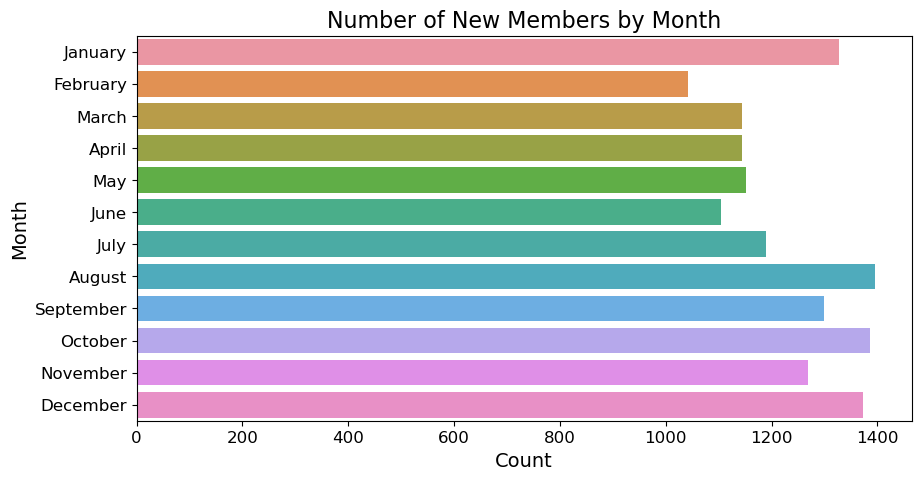

In [37]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_member.sort_values('month'), y = 'month_name')
plt.title('Number of New Members by Month', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Month', fontsize = 14)
plt.show()

### Mamber growth analysis weekly basis

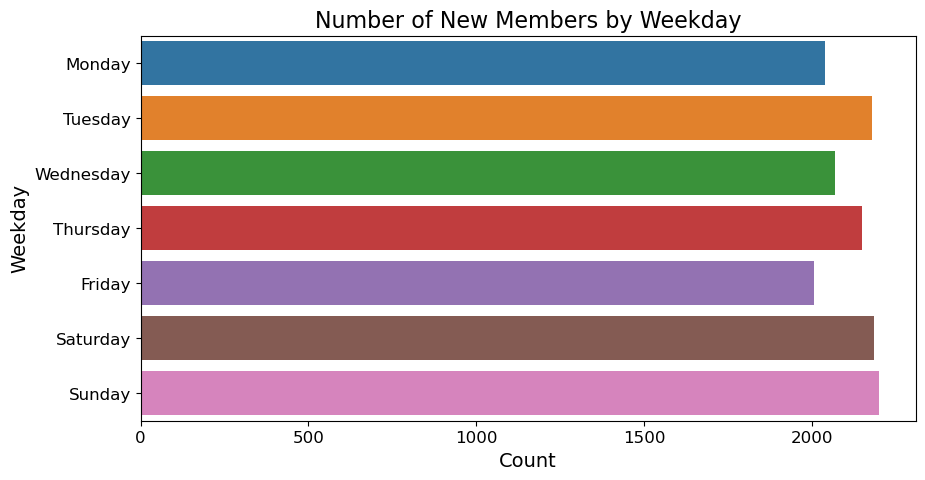

In [38]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_member.sort_values('day_of_week'), y = 'day_name')
plt.title('Number of New Members by Weekday', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Weekday', fontsize = 14)
plt.show()

### Bivariate Analysis based on age vs gender

              age
gender           
F       57.544950
M       52.116690
O       54.400943


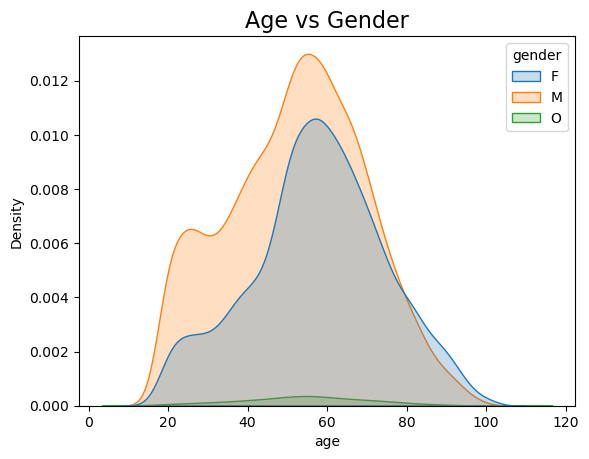

In [39]:
print(customers.groupby('gender').agg({'age': 'mean'}))
sns.kdeplot(data = customers, x = 'age', hue = 'gender', fill = True)
plt.title('Age vs Gender', fontsize = 16)
plt.show()

### Bivariate Analysis for income vs gender

              income
gender              
F       71306.412139
M       61194.601603
O       63287.735849


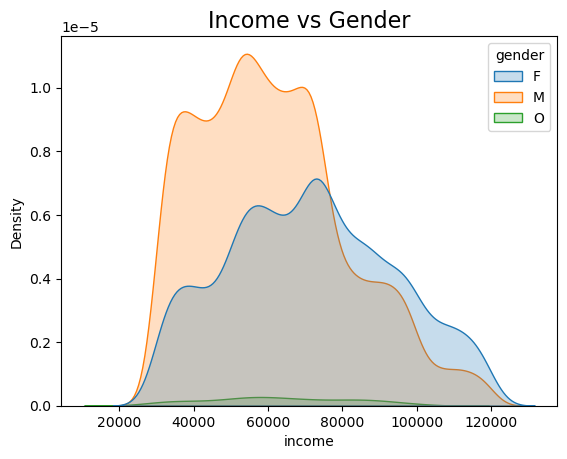

In [40]:
print(customers.groupby('gender').agg({'income': 'mean'}))
sns.kdeplot(data = customers, x = 'income', hue = 'gender', fill = True)
plt.title('Income vs Gender', fontsize = 16)
plt.show()

### Bivariate Analysis for income vs age

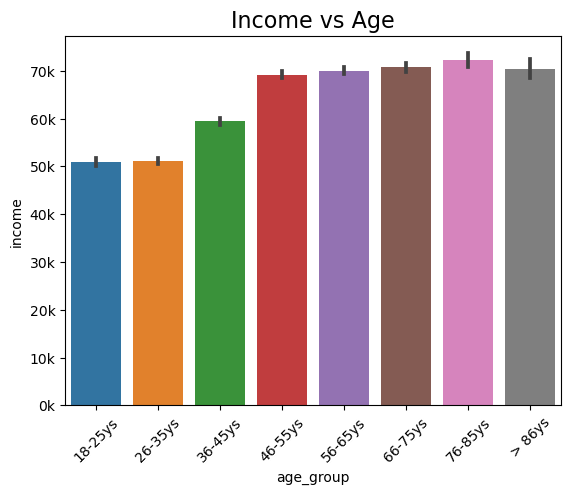

In [41]:
sns.barplot(data = customers, x = 'age_group', y = 'income')
plt.xticks(rotation = 45)
ytick_labels = [str(i) + 'k' for i in (np.arange(0, 80000, 10000) / 1000).astype(int)]
plt.yticks(np.arange(0, 80000, 10000), labels = ytick_labels)
plt.title('Income vs Age', fontsize = 16)
plt.show()

## EDA on Portfolio data

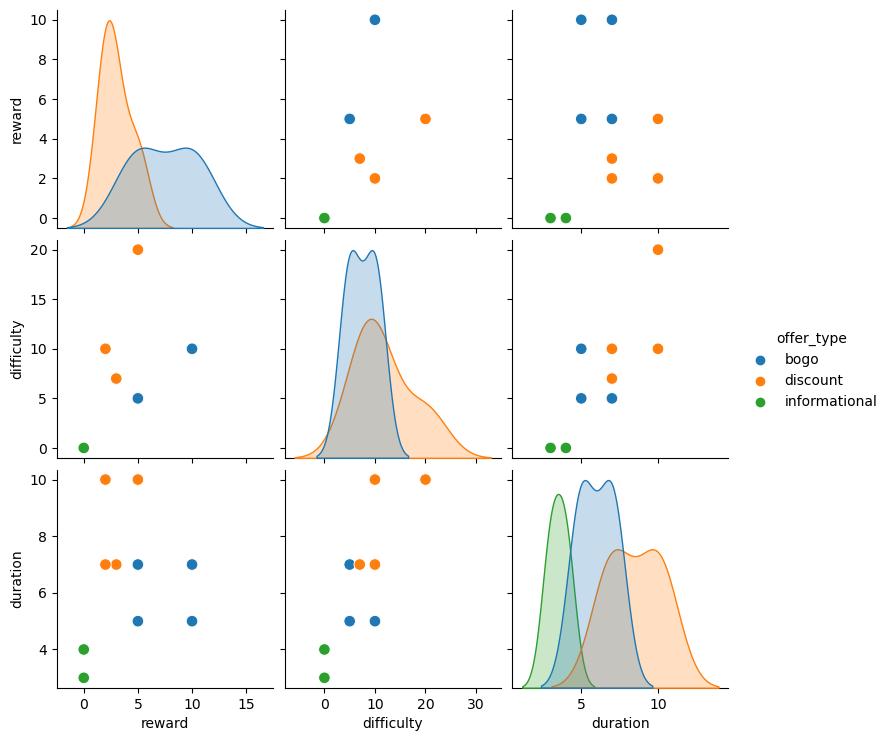

In [42]:
sns.pairplot(offers, hue = 'offer_type', 
             plot_kws = dict(marker="o", s=70),); plt.show()

### Univariate - channels

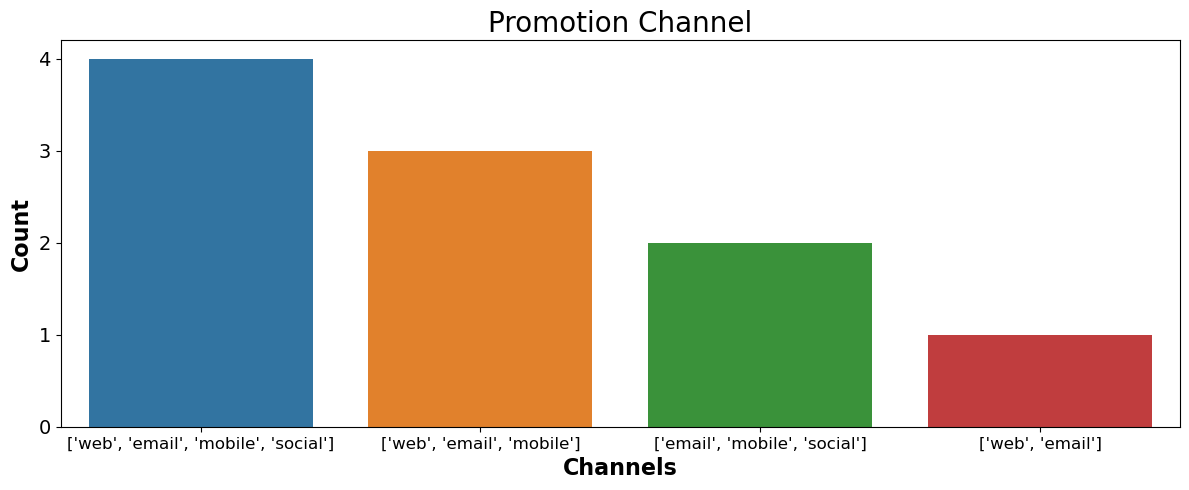

In [43]:
p = offers.value_counts('channels')
plt.figure(figsize = (12,5))
sns.barplot(x = p.index.values, y = p.values)
plt.xticks(rotation = None, fontsize = 12)
plt.yticks(np.arange(5), fontsize = 14)
plt.xlabel('Channels', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count', fontsize = 16, fontweight = 'bold')
plt.title('Promotion Channel', fontsize = 20)
plt.tight_layout()
plt.show()

### Correlation pair plot analysis 

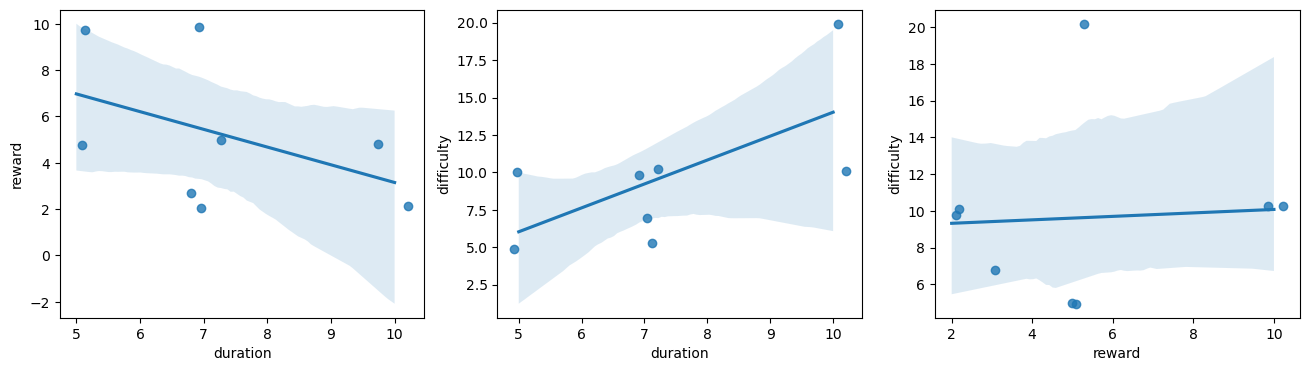

In [44]:
fig, axs = plt.subplots(1,3, figsize = (16,4))
sns.regplot(data = offers[0:8], x = 'duration', y ='reward', x_jitter = 0.3, y_jitter = 0.3, ax = axs[0])
sns.regplot(data = offers[0:8], x = 'duration', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[1])
sns.regplot(data = offers[0:8], x = 'reward', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[2])
plt.show()

## EDA analysis on transcripts

### Univariate Analysis based on event

In [45]:
transcripts['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

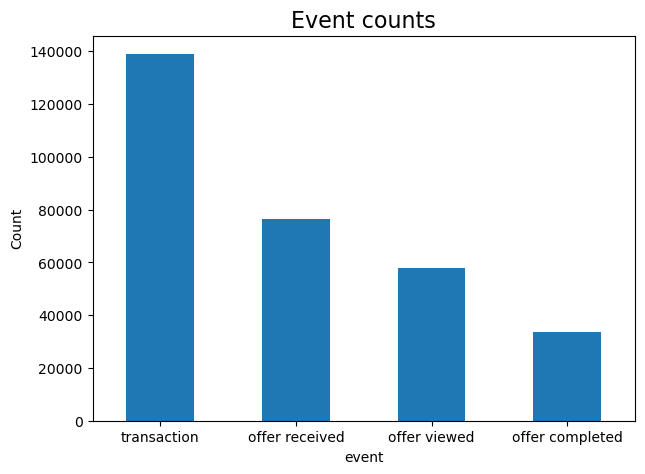

In [46]:
fig = plt.figure(figsize = (7,5))
transcripts['event'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = None)
plt.ylabel('Count')
plt.title('Event counts', fontsize = 16)
plt.show()

## Analysis of event over time

In [47]:
transcripts = transcripts.assign(days_since_start = transcripts['hours_since_start']/24).astype({'days_since_start': 'int64'})
print('The minimum and the maximum of column days_since_start: {} and {}'.format(transcripts['days_since_start'].min(), transcripts['days_since_start'].max()))

The minimum and the maximum of column days_since_start: 0 and 29


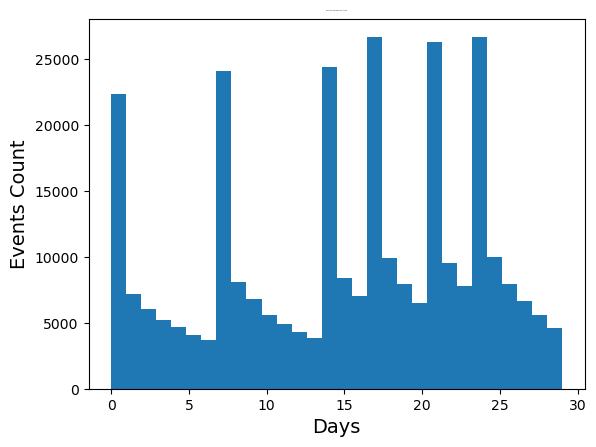

In [48]:
plt.hist(transcripts['days_since_start'], bins = 30)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Events Count', fontsize = 14)
plt.title('Events Occurrence over time', fontsize = 1)
plt.show()

In [49]:
transcripts[transcripts['event'] == 'offer received'].groupby('hours_since_start').count()

,person,event,dict_key,dict_value,days_since_start
hours_since_start,,,,,
0,12650,12650,12650,12650,12650
168,12669,12669,12669,12669,12669
336,12711,12711,12711,12711,12711
408,12778,12778,12778,12778,12778
504,12704,12704,12704,12704,12704
576,12765,12765,12765,12765,12765


## Events occurred in each hour

In [50]:
viewed_hourly = transcripts[transcripts['event'] == 'offer viewed'].value_counts('hours_since_start').sort_index()
completed_hourly = transcripts[transcripts['event'] == 'offer completed'].value_counts('hours_since_start').sort_index()
transaction_hourly = transcripts[transcripts['event'] == 'transaction'].value_counts('hours_since_start').sort_index()
print(len(viewed_hourly), len(completed_hourly), len(transaction_hourly))

120 120 120


In [51]:
(viewed_hourly.index.values == completed_hourly.index.values).sum(), (completed_hourly.index.values == transaction_hourly.index.values).sum()

(120, 120)

### Events of each type occurred on each day from Day 0 to Day 29

In [52]:
received_daily = transcripts[transcripts['event'] == 'offer received'].value_counts('days_since_start').sort_index()
viewed_daily = transcripts[transcripts['event'] == 'offer viewed'].value_counts('days_since_start').sort_index()
completed_daily = transcripts[transcripts['event'] == 'offer completed'].value_counts('days_since_start').sort_index()
transaction_daily = transcripts[transcripts['event'] == 'transaction'].value_counts('days_since_start').sort_index()

### Visualisation plot based on hourly data 

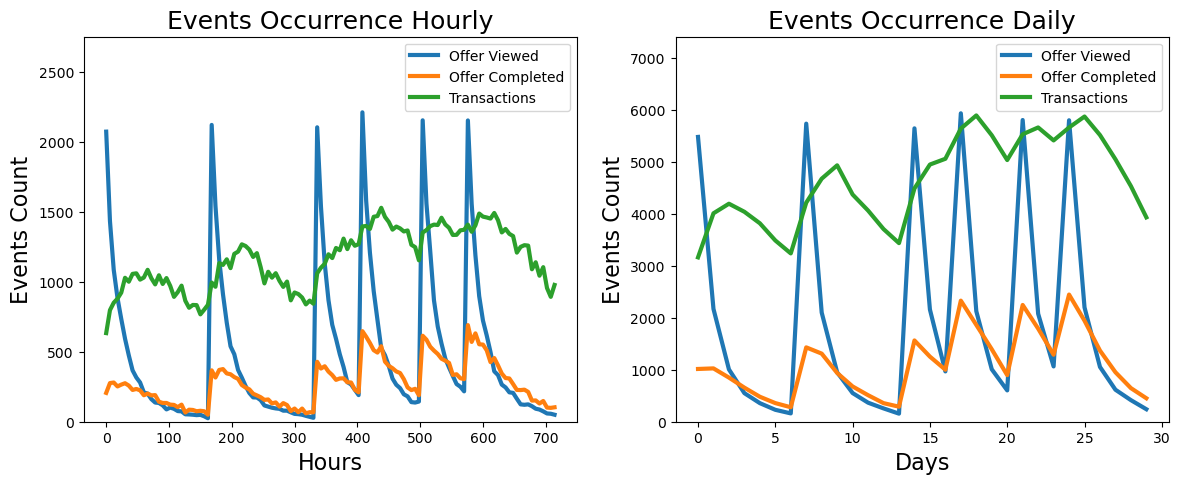

In [53]:
hours = viewed_hourly.index.values
fig, axs = plt.subplots(1,2, figsize = (14, 5))
# axs[0].stem(received_hourly.index.values, received_hourly, linefmt = ':k')
axs[0].plot(hours, viewed_hourly, lw = 3)
axs[0].plot(hours, completed_hourly, lw = 3)
axs[0].plot(hours, transaction_hourly, lw = 3)
axs[0].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
axs[0].set_ylim([0, 2750])
axs[0].set_xlabel('Hours', fontsize = 16)
axs[0].set_ylabel('Events Count', fontsize = 16)
axs[0].set_title('Events Occurrence Hourly', fontsize = 18)
days = np.arange(30)
# axs[1].stem(received_daily.index.values, received_daily, linefmt = ':k')
axs[1].plot(days, viewed_daily, lw = 3)
axs[1].plot(days, completed_daily, lw = 3)
axs[1].plot(days, transaction_daily, lw = 3)
axs[1].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
axs[1].set_ylim([0, 7400])
axs[1].set_xlabel('Days', fontsize = 16)
axs[1].set_ylabel('Events Count', fontsize = 16)
axs[1].set_title('Events Occurrence Daily', fontsize = 18)
plt.show()

### Most popular offers based on demands and popularity 

In [54]:
df_event = transcripts[~(transcripts['event'] == 'transaction')]
# Merging df_event with and offers
event_offer = pd.merge(df_event, offers, left_on = 'dict_value', right_on = 'id').drop('id', axis = 1)
#  Columns of the merged df
col_names = ['person', 'event', 'offer_alias', 'reward',
       'channels', 'difficulty', 'duration', 'offer_type', 'hours_since_start', 'days_since_start', 'dict_key', 'dict_value',]
event_offer = event_offer[col_names]
event_offer = event_offer.drop('dict_value', axis = 1)
event_offer.sample(3)

,person,event,offer_alias,reward,channels,difficulty,duration,offer_type,hours_since_start,days_since_start,dict_key
96484,e791350673c44c749c90ca39d3b28b4c,offer viewed,B,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,462,19,offer id
80120,fb941450da9d4547be5eb4a8acf85f51,offer completed,D,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,516,21,offer_id
85114,39af105b5ff94f609fcd37297911791d,offer received,B,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,0,0,offer id


## Overall Completion Rate 

In [55]:
offer_received = event_offer[event_offer['event'] == 'offer received']
p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)
offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

## visualisation of completion rate of each offer

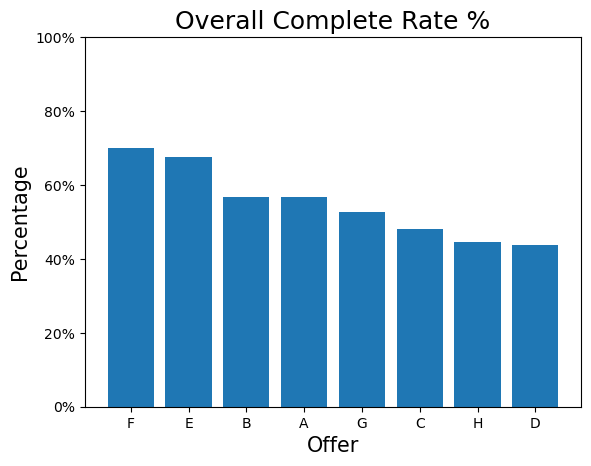

In [56]:
overall_complete_rate = (p2.sort_index() / p0.sort_index()).sort_values(ascending = False)
# Visualize
plt.bar(x = overall_complete_rate.index.values, height = overall_complete_rate.values)
plt.title('Overall Complete Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

## Event offer received

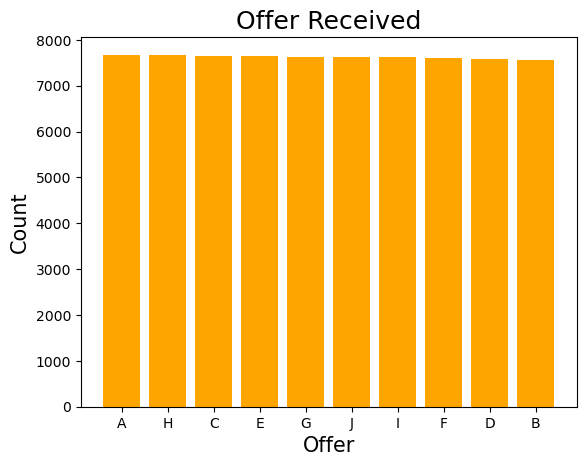

In [57]:
plt.bar(x = np.arange(len(p0)), height = p0.values, tick_label = p0.index.values, color = 'orange')
plt.title('Offer Received', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### Visualisation based on time each offer received on each receiving day

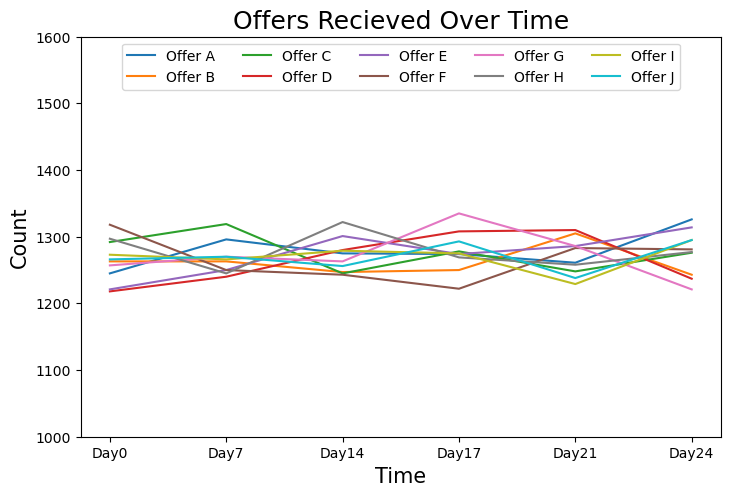

In [58]:
num_offers = offers.shape[0]
each_offer_received = pd.DataFrame(index = received_daily.index.values)
for col in ascii_uppercase[:num_offers]:
    each_offer_received[col] = offer_received[offer_received['offer_alias'] == col].value_counts('days_since_start').sort_index()
each_offer_received.index = ['Day' + str(x) for x in received_daily.index.values]

# Visualize
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8))

for col in ascii_uppercase[:num_offers]:
    ax.plot(np.arange(6), each_offer_received[col])
    
ax.set_ylim([1000,1600])
ax.set_xticks(np.arange(6))
ax.set_xticklabels(each_offer_received.index.values)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
legend_str = ['Offer ' + i for i in ascii_uppercase[:num_offers]]
plt.legend(legend_str, loc = 'upper center', ncol = 5, fontsize = 10)
plt.title('Offers Recieved Over Time', fontsize = 18)
plt.show()

## Rate percent view 

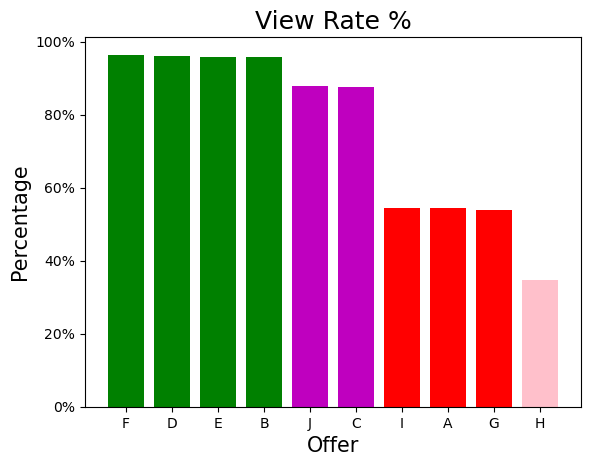

In [59]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
p1 = offer_viewed.value_counts('offer_alias').sort_values(ascending = False)
p1_rate = (p1.sort_index() / p0.sort_index()).sort_values(ascending = False)
plt.bar(x = np.arange(len(p1)), height = p1_rate.values, tick_label = p1_rate.index.values,
       color = ['g', 'g','g', 'g', 'm', 'm','r', 'r', 'r', 'pink'])
plt.title('View Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

### Completion Rate percentage 

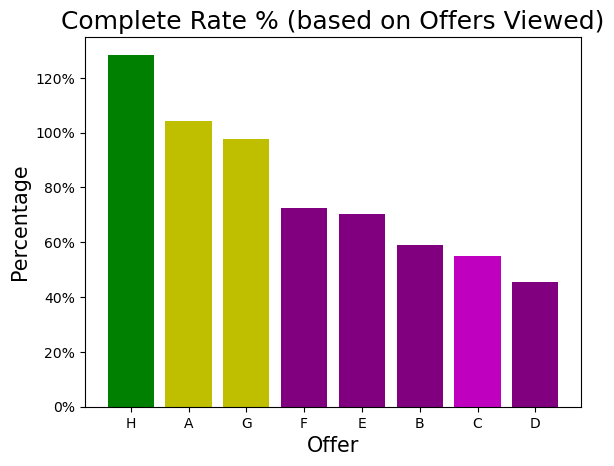

In [60]:
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

p2_rate = (p2.sort_index() / p1.sort_index()).sort_values(ascending = False)
color_list = ['g', 'y', 'y', 'purple', 'purple', 'purple', 'm', 'purple']
plt.bar(x = p2_rate.index.values, height = p2_rate.values, color = color_list)
plt.title('Complete Rate % (based on Offers Viewed)', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.4, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%', '120%'])
plt.show()

## Factors correlation with the view rate percentage and the completion rate percentage

In [61]:
offers_added = offers.assign(view_rate = p1_rate.sort_index().values,
                            complete_rate = p2_rate.sort_index().values)
offers_added.set_index('offer_alias', inplace = True)
offers_numeric = offers_added.select_dtypes(include = 'number')
offers_numeric.head()

,reward,difficulty,duration,view_rate,complete_rate
offer_alias,,,,,
A,5,5,7,0.543311,1.043874
B,5,5,5,0.959451,0.591410
C,10,10,7,0.876991,0.549136
D,10,10,5,0.961148,0.456426
E,3,7,7,0.959587,0.702740


## Correlation plot based on complete and view rate 

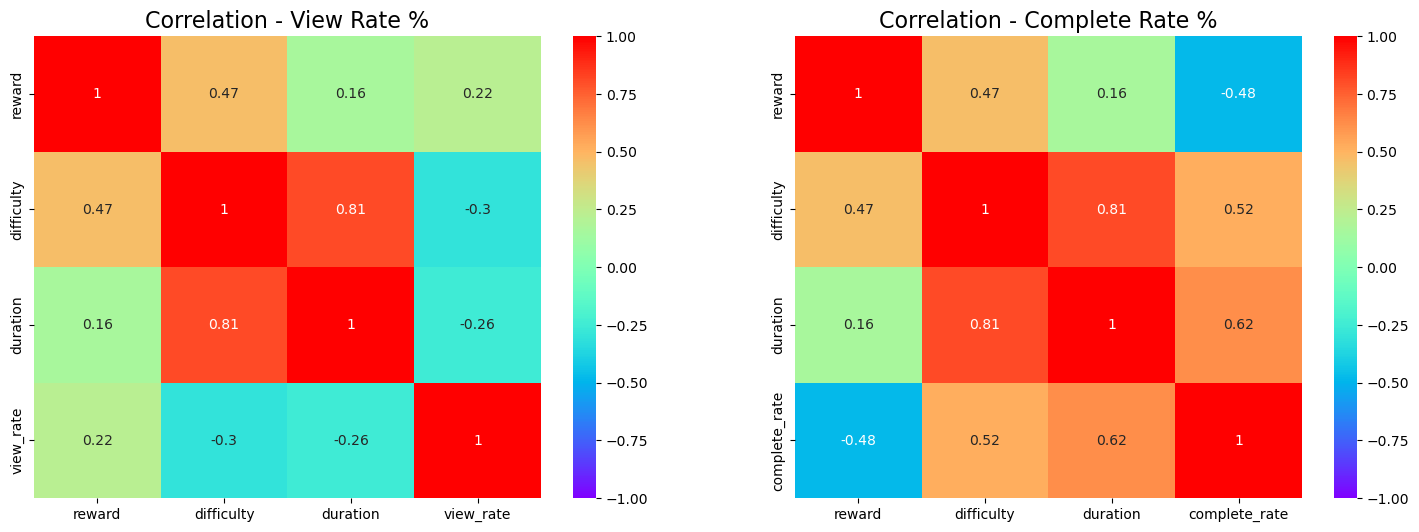

In [62]:
fig, axs = plt.subplots(1,2, figsize = (18, 6))
sns.heatmap(offers_numeric.iloc[:, :-1].corr(), cmap = 'rainbow', 
            annot = True, vmin = -1, vmax = 1, ax = axs[0])
axs[0].set_title('Correlation - View Rate %', fontsize = 16)

sns.heatmap(offers_numeric.iloc[:, [0,1,2,4]].corr(), cmap = 'rainbow', 
            annot = True, vmin = -1, vmax = 1, ax = axs[1])
axs[1].set_title('Correlation - Complete Rate %', fontsize = 16)
plt.show()

## Customer Segmentation Analysis 

### Customer behavior

In [63]:
customer_behavior = pd.DataFrame(columns = ['person', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent'])

### Removing rows of customers with missing gender and income

In [64]:
id_to_remove = missing_income['id']
transcripts_filtered = transcripts[~transcripts['person'].isin(id_to_remove)].reset_index(drop = True)
customer_behavior['person'] = transcripts_filtered.value_counts('person').sort_index().index.values

In [65]:
transcripts_filtered = transcripts_filtered.sort_values('person')
transcripts_grouped = transcripts_filtered.groupby(['person', 'event']).count()
transcripts_grouped.head()

dict_key  dict_value  \
person                           event                                   
0009655768c64bdeb2e877511632db8f offer completed         3           3   
                                 offer received          5           5   
                                 offer viewed            4           4   
                                 transaction             8           8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed         3           3   

                                                  hours_since_start  \
person                           event                                
0009655768c64bdeb2e877511632db8f offer completed                  3   
                                 offer received                   5   
                                 offer viewed                     4   
                                 transaction                      8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed                  3   

                                                  days_since_start  
person                           event                              
0009655768c64bdeb2e877511632db8f offer completed                 3  
                                 offer received                  5  
                                 offer viewed                    4  
                                 transaction                     8  
0011e0d4e6b944f998e987f904e8c1e5 offer completed                 3

### Set person as index for easy slicing

In [66]:
customer_behavior.set_index('person', inplace = True)
for person_id in customer_behavior.index.values:
    if (person_id, 'offer received') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_received'] = transcripts_grouped.loc[(person_id, 'offer received'), 'dict_key']
    if (person_id, 'offer viewed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_viewed'] = transcripts_grouped.loc[(person_id, 'offer viewed'), 'dict_key']
    if (person_id, 'offer completed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_completed'] = transcripts_grouped.loc[(person_id, 'offer completed'), 'dict_key']
    if (person_id, 'transaction') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_transactions'] = transcripts_grouped.loc[(person_id, 'transaction'), 'dict_key']

In [67]:
money_spent = transcripts_filtered[transcripts_filtered['event'] == 'transaction'].groupby('person').agg({'dict_value': 'sum'})
customer_behavior['money_spent'] = money_spent
customer_behavior.head(3)

,num_received,num_viewed,num_completed,num_transactions,money_spent
person,,,,,
0009655768c64bdeb2e877511632db8f,5,4,3,8,127.6
0011e0d4e6b944f998e987f904e8c1e5,5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,5,3,3,8,196.86


In [68]:
customer_behavior.isna().sum()

num_received           5
num_viewed           150
num_completed       2839
num_transactions     333
money_spent          333
dtype: int64

## Mitigating null values 

In [69]:
customer_behavior.fillna(0, inplace = True)
customer_behavior.isna().sum()

num_received        0
num_viewed          0
num_completed       0
num_transactions    0
money_spent         0
dtype: int64

### Features with plots

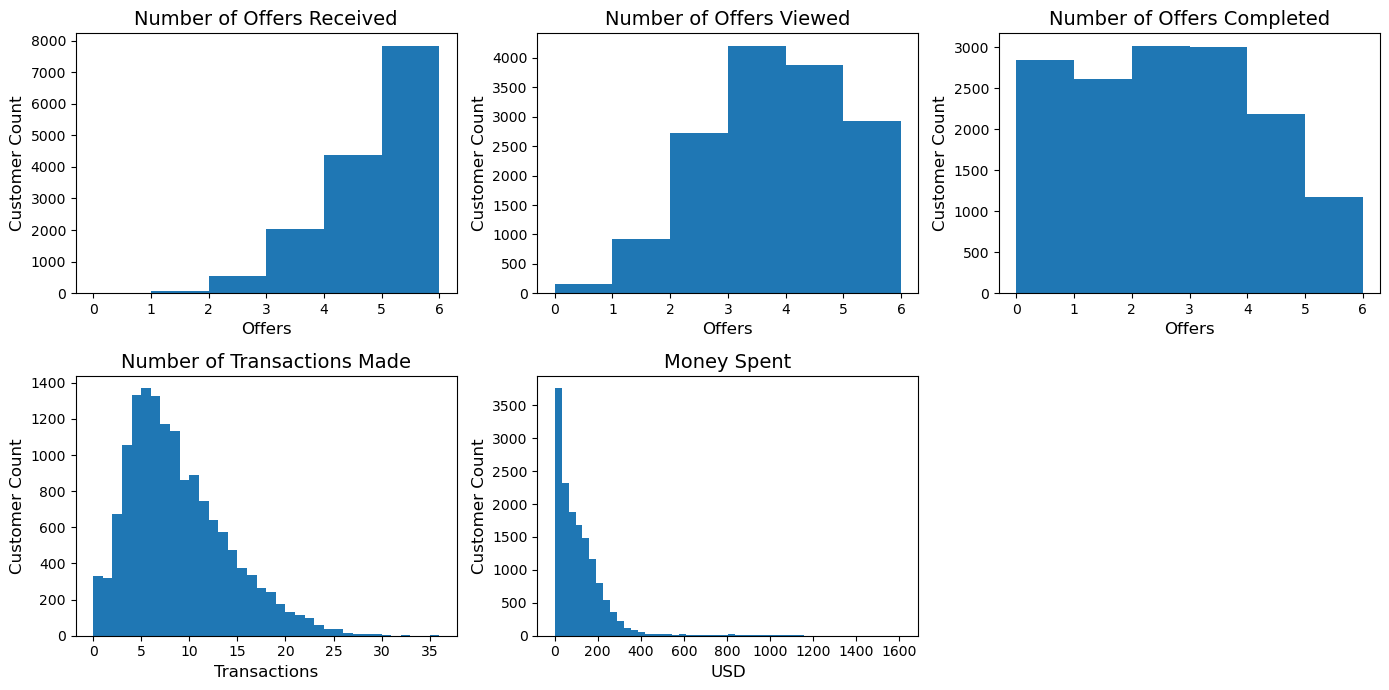

In [70]:
fig, axs = plt.subplots(2,3, figsize = (14, 7))
fig_titles = ['Number of Offers Received', 'Number of Offers Viewed', 'Number of Offers Completed', 'Number of Transactions Made', 'Money Spent']
x_labels = ['Offers', 'Offers','Offers','Transactions','USD']
y_labels = 'Customer Count'

sub_row, sub_col = 0, 0

for i in range(5):
    if i < 3:
        sub_row = 0
        sub_col = i
        bins = customer_behavior.iloc[:, i].max()
        axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
        axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)

    else:
        sub_row = 1
        sub_col = i - 3
        if i == 3:
            bins = customer_behavior.iloc[:, i].max()
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
        else:
            bins = 50
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
    
    axs[sub_row, sub_col].set_title(fig_titles[i], fontsize = 14)
    axs[sub_row, sub_col].set_xlabel(x_labels[i], fontsize = 12)

axs[1,2].set_axis_off()
plt.tight_layout()
plt.show()

### Preparing dataframe for analyse customer behaviour for clustering  

In [71]:
customer_behavior_with_num_received = customer_behavior.copy()
customer_behavior.drop('num_received', axis = 1, inplace = True)
customer_behavior.head(3)

,num_viewed,num_completed,num_transactions,money_spent
person,,,,
0009655768c64bdeb2e877511632db8f,4,3,8,127.60
0011e0d4e6b944f998e987f904e8c1e5,5,3,5,79.46
0020c2b971eb4e9188eac86d93036a77,3,3,8,196.86


## Removing outliers

In [72]:
customer_behavior['money_spent'].describe()

count    14825.000000
mean       117.028155
std        129.965016
min          0.000000
25%         31.450000
50%         87.040000
75%        160.900000
max       1608.690000
Name: money_spent, dtype: float64

### Removing rows with top 2% in `money_spent`

In [73]:

q = customer_behavior['money_spent'].quantile(0.98)
rows_top_money_spent = customer_behavior[customer_behavior['money_spent'] >= q]

person_top_money_spent = rows_top_money_spent.index.values
customer_top_money_spent_removed = customer_behavior[customer_behavior['money_spent'] < q]

print('Number of rows removed:', rows_top_money_spent.shape[0])

Number of rows removed: 297


### Pairplot analysis of customer behaviour 

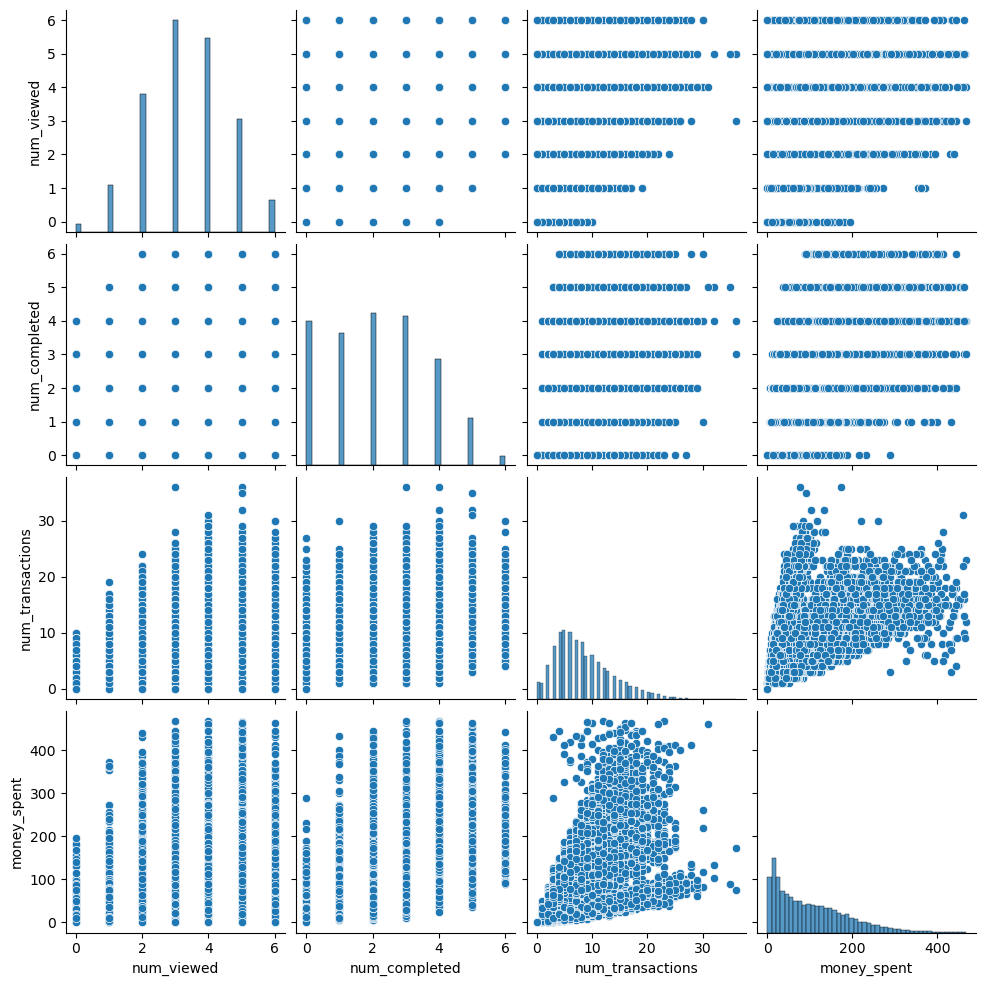

In [74]:
customer_behavior_filtered = customer_top_money_spent_removed.copy()
sns.pairplot(customer_behavior_filtered); plt.show()

## K-Means Clustering

### Scalling features 

In [75]:
scaler_customer_behavior = StandardScaler()
scaler_customer_behavior.fit(customer_behavior_filtered)
customer_behavior_scaled = scaler_customer_behavior.transform(customer_behavior_filtered)
pd.DataFrame(data = customer_behavior_scaled, columns = customer_behavior_filtered.columns.values).head(3)

,num_viewed,num_completed,num_transactions,money_spent
0,0.501233,0.531352,-0.060069,0.277234
1,1.276977,0.531352,-0.639666,-0.281415
2,-0.274511,0.531352,-0.060069,1.080974


### Optimal number of clusters k

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
df_feature = customer_behavior_scaled
linkage_matrix = linkage(df_feature, method='ward')
wcss = []
sil_score = []
max_clusters = 10

if wcss:
        optimal_num_clusters = np.argmin(np.diff(wcss)) + 1
        print(f"Optimal number of clusters (Elbow Method): {optimal_num_clusters}")
else:
    print("Unable to find optimal number of clusters using Elbow Method")

Unable to find optimal number of clusters using Elbow Method


## KMeans clusturing 

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
0    2882
1    4029
2    2634
3    3394
4    1589
Name: count, dtype: int64

 ************************************************************
Silhouette Score: 0.2748936800562107

 ************************************************************
        num_viewed num_completed num_transactions money_spent
              mean          mean             mean        mean
cluster                                                      
0              4.5           4.1             12.2       223.6
1              2.1           0.7              5.0        34.7
2              4.5           1.5              4.5        50.1
3              2.9           2.9              7.7       140.1
4              3.5           2.0             17.1        72.4


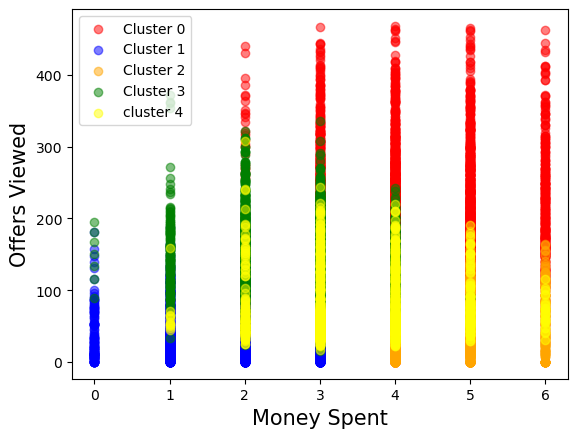

In [77]:
k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters = k, random_state = 10)
kmeans.fit_transform(df_feature)
customer_with_cluster = customer_behavior_filtered.assign(cluster = kmeans.labels_)
print(customer_with_cluster.value_counts('cluster').sort_index())

line_sep = '*' * 60
print('\n', line_sep)
print('Silhouette Score:', metrics.silhouette_score(df_feature, labels = kmeans.labels_))


cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])
print('\n', line_sep)
print(cluster_info.round(1))

color_list = ['red', 'blue', 'orange', 'green', 'yellow']
legend_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'cluster 4']
for i in range(k):
    plt.scatter(customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'num_viewed'],
               customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'money_spent'],
               c = color_list[i], label = legend_list[i], alpha = 0.5)
plt.ylabel('Offers Viewed', fontsize = 15)
plt.xlabel('Money Spent', fontsize = 15)
plt.legend(legend_list)
plt.show()

## Classification model

## Spliting for train and test

In [78]:
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

## Random Forest Classifier Model implementation

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

## Accuracy score of Random Forest Classifier model  

In [80]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.9893324156916724


## Confusion matrix of RandomForestClassifier model  

Text(0.5, 427.9555555555555, 'Predicted label')

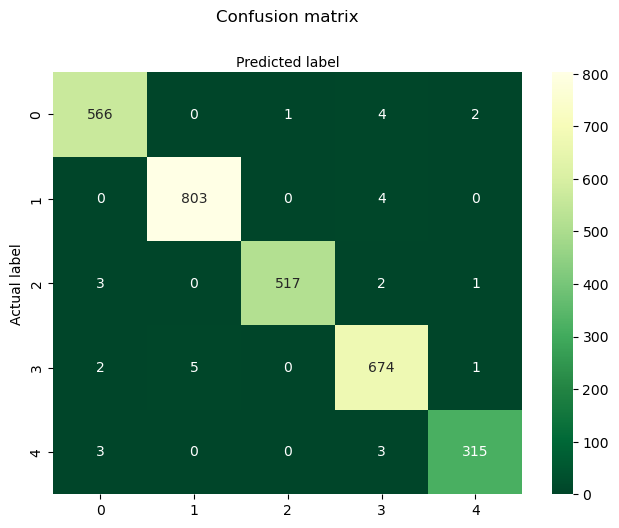

In [81]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGn_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Classification report of the model 

In [82]:
target_names = ['0', '1', '2', '3','4']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       573
           1       0.99      1.00      0.99       807
           2       1.00      0.99      0.99       523
           3       0.98      0.99      0.98       682
           4       0.99      0.98      0.98       321

    accuracy                           0.99      2906
   macro avg       0.99      0.99      0.99      2906
weighted avg       0.99      0.99      0.99      2906

